In [30]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

In [31]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [32]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [33]:
bdata

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


Text(0.5,1,'The Distribution of House Prices')

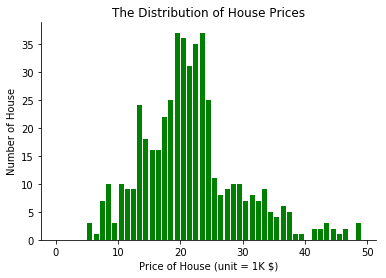

In [34]:
import matplotlib.pyplot as plt  
%matplotlib inline 

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.hist(bdata.target,bins = range(50), rwidth = 0.8, color = 'green', edgecolor = 'none')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.xlabel('Price of House (unit = 1K $)')
plt.ylabel('Number of House')
plt.title('The Distribution of House Prices')



###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


In [35]:
# enter your code below
boston_df = pd.DataFrame(bdata.data)
boston_df.columns = bdata.feature_names
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
boston_df['PRICE'] = bdata.target
boston_df.shape
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(0.5,1,'Plot of Crime and House Price')

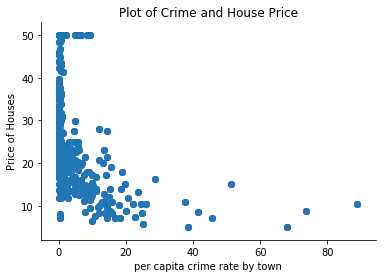

In [37]:
fig = plt.figure()
ax2 = plt.subplot2grid((1,1), (0,0))
ax2.scatter(boston_df.CRIM, boston_df.PRICE, color = 'b')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.scatter(boston_df.CRIM, boston_df.PRICE)

plt.xlabel('per capita crime rate by town')
plt.ylabel('Price of Houses')
plt.title('Plot of Crime and House Price')

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

Text(0.5,1,'Plot of age and House Price')

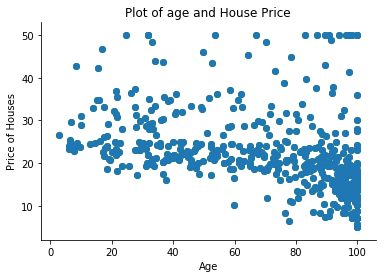

In [38]:
# enter your code here
fig = plt.figure()
ax3 = plt.subplot2grid((1,1), (0,0))
ax3.scatter(boston_df.AGE, boston_df.PRICE, color = 'green')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.scatter(boston_df.AGE, boston_df.PRICE)

plt.xlabel('Age')
plt.ylabel('Price of Houses')
plt.title('Plot of age and House Price')

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [39]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
def compute_rmse(predictions, yvalues):
    #your code here

    rmse = 0
    for i in range(len(predictions)):
        rmse += (predictions[i] - yvalues[i])**2
    rmse = (rmse/len(predictions))**0.5    
    return rmse

print (compute_rmse([2,2,3],[0,2,6]))

2.0816659994661326


###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [40]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# enter your code here

from sklearn.cross_validation import train_test_split

X = bdata.data
Y = bdata.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34)

#bdata_train, bdata_test = train_test_split(bdata.data, test_size=0.34)
#len(bdata_train)
#len(bdata_test)
len(Y_train)

333

###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [41]:
# enter your code here
# create the model of calculate mean

def mean_model(Y_data):
    predict_value = sum(Y_data)/len(Y_data)
    #predict_data = len(Y_data) * [predict_value]
    return predict_value
# Compute the RMSE on the training data

print('The RMSE of train_data:')
print(compute_rmse(len(Y_train)*[mean_model(Y_train)], Y_train))


The RMSE of train_data:
9.430689678794845


In [42]:
# Compute the RMSE on the training data
print(compute_rmse(len(Y_test)*[mean_model(Y_train)], Y_test))

8.749574189135286


*Enter your observations here*

The RMSE of test data is even lower than the RMSE of the train date, which I think means that the model is kind of random and not sound. But I don't know the 8~9 is relatively high or low.

In [43]:
from sklearn import datasets, linear_model, metrics 
reg = linear_model.LinearRegression() 
from sklearn.preprocessing import normalize
X_train= normalize(X_train,norm='l1',axis = 0)
X_test= normalize(X_test,norm='l1',axis = 0)

reg.fit(X_train, Y_train) 

predict_train = reg.predict(X_train)


predict_test = reg.predict(X_test)
print(compute_rmse(predict_train, Y_train))
print(compute_rmse(predict_test, Y_test))

4.886941122568254
14.423236386335937


---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [44]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):
    #your code here
    #when p = 1, Edistance, p = 2, Mdistance
    dist = 0
    for j in range(len(x1)):
        dist += abs(x1[j]-x2[j])**L 
        
    dist = dist**(1/L)
    return dist

print(distance((3,4),(6,8),2))

5.0


###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [45]:
X_trainnn = X_train[:, [0, 5]]
X_testnn = X_test[:, [0, 5]]
X_trainnn.shape
X_testnn.shape

(173, 2)

In [46]:
"""
# write your function specification here!
"""
import time

X_trainnn = X_train[:, [0, 5]]
X_testnn = X_test[:, [0, 5]]

def nneighbor(X, Y, L):
    start_time = time.time()
    Y_predict = []
    for m in range(X.shape[0]):
        nearest_y = 1e100
        nearest_dist = 1e100
        for n in range(X.shape[0]):
            if m == n:
                continue
            else:
                dist = distance(X[m,:], X[n,:], L)
                if dist < nearest_dist:
                    nearest_dist = dist
                    nearest_y = Y[n] 
        Y_predict.append(nearest_y)
        
    #your code here:
    print (f"Time taken: {str(round(time.time() - start_time,2))} seconds")
    return compute_rmse(Y_predict, Y)

#your additional code here

rmse = nneighbor(X_trainnn, Y_train, 2)
print (rmse)

Time taken: 0.35 seconds
8.048283348942485


In [47]:
rmse = nneighbor(X_testnn, Y_test, 2)
print (rmse)

Time taken: 0.12 seconds
5.011449319054982


###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [48]:
"""
# write your function specification here! 
"""
def normalize(raw_data):
    #your code here
    mean = np.mean(raw_data)
    std = np.std(raw_data)
    normalized_data = []
    for i in range(len(raw_data)):
        nv = (raw_data[i] - mean) / std
        normalized_data.append(nv)
    
    return np.array(normalized_data)

#your additional code here

def normalizem(M):
    for i in range(M.shape[1]):
        M[:,i] = normalize(M[:,i])
    return M

#print(normalizem(X_trainnn))

rmse = nneighbor(normalizem(X_trainnn), Y_train, 2)
print (rmse)


Time taken: 0.36 seconds
8.140271741411587


In [49]:
rmse = nneighbor(normalizem(X_testnn), Y_test, 2)
print (rmse)


Time taken: 0.14 seconds
4.723407460158618


*enter your observations here*

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [50]:
# enter your code here
# 0：CRI，1：ZN:，2：INDUS，3：CHAS，4：NOX，5:RM，6：AGE，7：DIS，8：RAD，9：TAX，10：PTRATIO，11:B, 12:LSTAT
X_train12 = X_train[:, [1, 2]]
X_test12 = X_test[:, [1, 2]]
print('The model with ZN and INDUS: ')
print(nneighbor(normalizem(X_train12), Y_train, 2))
print(nneighbor(normalizem(X_test12), Y_test, 2))

print('\n')
X_train39 = X_train[:, [3, 9]]
X_test39 = X_test[:, [3, 9]]
print('The model with CHAS and TAX: (L=2)')
print(nneighbor(normalizem(X_train39), Y_train, 2))
print(nneighbor(normalizem(X_test39), Y_test, 2))
print('The model with CHAS and TAX: (L=1)')
print(nneighbor(normalizem(X_train39), Y_train, 1))
print(nneighbor(normalizem(X_test39), Y_test, 1))

print('\n')
X_train0359 = X_train[:, [0, 3, 5, 9]]
X_test0359 = X_test[:, [0, 3, 5, 9]]
print('The model with CRI, CHAS, RM and TAX: (L=2)')
print(nneighbor(normalizem(X_train0359), Y_train, 2))
print(nneighbor(normalizem(X_test0359), Y_test, 2))
print('The model with CRI, CHAS, RM and TAX: (L=1)')
print(nneighbor(normalizem(X_train0359), Y_train, 1))
print(nneighbor(normalizem(X_test0359), Y_test, 1))

The model with ZN and INDUS: 
Time taken: 0.37 seconds
8.476847110626503
Time taken: 0.08 seconds
10.209422713294236


The model with CHAS and TAX: (L=2)
Time taken: 0.31 seconds
10.105268747364246
Time taken: 0.08 seconds
10.501648645686856
The model with CHAS and TAX: (L=1)
Time taken: 0.32 seconds
10.105268747364246
Time taken: 0.07 seconds
10.501648645686856


The model with CRI, CHAS, RM and TAX: (L=2)
Time taken: 0.47 seconds
6.7103143233620814
Time taken: 0.12 seconds
4.498651050223422
The model with CRI, CHAS, RM and TAX: (L=1)
Time taken: 0.43 seconds
6.891778189016721
Time taken: 0.11 seconds
4.641998523159753


*enter your observations here*

The models with different features are 

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [51]:
# enter your code here\

feature_selction = [0,5]

X = bdata.data
Y = bdata.target


def kfold_nn(X, Y, feature_selction, L, Kfold): 
    X = X 
    split = X.shape[0] / Kfold
    train_rmse = 0
    eval_rmse = 0
    for k in range(Kfold):
        eval_from = int(split * k) 
        eval_to = int(split * (k+1))
        train_from = int(split * (k+1))
        train_to = int(split * (k+Kfold))
        
        X_eval = X[eval_from:eval_to, feature_selction]
        Y_eval = Y[eval_from:eval_to]
        if train_to <=  X.shape[0]:
            X_train = X[train_from:train_to, feature_selction]
            Y_train = Y[train_from:train_to]
        else:
            X_train = np.concatenate((
                X[train_from:, feature_selction],
                X[0:train_to-X.shape[0], feature_selction],
            ))
            Y_train = np.concatenate((
                Y[train_from:],
                Y[0:train_to-X.shape[0]],
            ))
        train_rmse += nneighbor(normalizem(X_train), Y_train, 2)
        eval_rmse += nneighbor(normalizem(X_eval), Y_eval, 2)
    
    return (train_rmse/Kfold, eval_rmse/Kfold)
    #X_testnn = X_test[:, [0, 5]]

(train_rmse, eval_rmse) = kfold_nn(X,Y,feature_selction, 2, 10)
print (f"train_rmse={train_rmse} eval_rmse={eval_rmse}")


Time taken: 0.62 seconds
Time taken: 0.01 seconds
Time taken: 0.59 seconds
Time taken: 0.01 seconds
Time taken: 0.59 seconds
Time taken: 0.01 seconds
Time taken: 0.57 seconds
Time taken: 0.01 seconds
Time taken: 0.57 seconds
Time taken: 0.01 seconds
Time taken: 0.59 seconds
Time taken: 0.01 seconds
Time taken: 0.57 seconds
Time taken: 0.01 seconds
Time taken: 0.56 seconds
Time taken: 0.01 seconds
Time taken: 0.57 seconds
Time taken: 0.01 seconds
Time taken: 0.58 seconds
Time taken: 0.01 seconds
train_rmse=7.380003803450842 eval_rmse=5.326792178413459


###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [61]:
"""
# write your function specification here!
"""

import queue as Q

def knn(X, Y, L, K):
    #start_time = time.time()
    
    # pre-calculate dist(m,n) so we do not need to re-caculate dist(n,m)
    dist = np.zeros((X.shape[0], X.shape[0]))
    for m in range(X.shape[0]):
        for n in range(X.shape[0]):
            if m == n:
                continue
            dist[m,n] = dist[n,m] = distance(X[m,:], X[n,:], L)
    
    Y_predict = []
    
    for m in range(X.shape[0]):
        queue = Q.PriorityQueue()
        for n in range(X.shape[0]):
            if m == n:
                continue
            
            # always maitain top-K nearest neigbour so far
            queue.put((dist[m,n],Y[n]))
            
            # pop out the farest neibour if queue is larger than K
            if queue.qsize() > K:
                queue.get()
        # pop out top-K and get sum
        sumY = 0
        while not queue.empty():
            sumY += queue.get()[1]
        Y_predict.append(sumY/K)

    #print (f"Time taken: {str(round(time.time() - start_time,2))} seconds")
    return compute_rmse(Y_predict, Y)
print(knn(X_trainnn, Y_train, 2, 3))

16.635942852588624


###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [66]:
# enter your code here
"""
feature_selction = [0, 1, 5, 6, 7, 9]

0：CRIM，1：ZN:，2：INDUS，3：CHAS，4：NOX，5:RM，6：AGE，7：DIS，8：RAD，9：TAX，10：PTRATIO，11:B, 12:LSTAT


X = bdata.data
Y = bdata.target
"""

def tenfold_nn(X, Y, feature_selction, L): 
    X = X 
    split = X.shape[0] / 10
    train_rmse = 0
    eval_rmse = 0
    for k in range(10):
        eval_from = int(split * k) 
        eval_to = int(split * (k+1))
        train_from = int(split * (k+1))
        train_to = int(split * (k+10))
        
        X_eval = X[eval_from:eval_to, feature_selction]
        Y_eval = Y[eval_from:eval_to]
        if train_to <=  X.shape[0]:
            X_train = X[train_from:train_to, feature_selction]
            Y_train = Y[train_from:train_to]
        else:
            X_train = np.concatenate((
                X[train_from:, feature_selction],
                X[0:train_to-X.shape[0], feature_selction],
            ))
            Y_train = np.concatenate((
                Y[train_from:],
                Y[0:train_to-X.shape[0]],
            ))
        train_rmse += knn(normalizem(X_train), Y_train, 2, K)
        eval_rmse += knn(normalizem(X_eval), Y_eval, 2, K)
    
    return (train_rmse/10, eval_rmse/10)


# 0：CRI，1：ZN:，2：INDUS，3：CHAS，4：NOX，5:RM，6：AGE，7：DIS，8：RAD，9：TAX，10：PTRATIO，11:B, 12:LSTAT
feature_selction = [0, 1, 5, 6, 7, 9]
X = bdata.data
Y = bdata.target
evalrmse = []
trainrmse = []

for K in range(1,26):
    (train_rmse, eval_rmse) = tenfold_nn(X,Y,feature_selction, K)
    evalrmse.append(eval_rmse)
    trainrmse.append(train_rmse)

print(trainrmse)
print(evalrmse)

#print (f"train_rmse={train_rmse} eval_rmse={eval_rmse}")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


[15.772295585143215, 16.57446849868621, 17.29514498015391, 16.65592327988765, 16.28772224080539, 15.856464685660375, 15.742290357123887, 15.583724204323184, 15.36598564241091, 15.214772753926994, 15.097979211035641, 15.06874900194945, 15.077788408512038, 14.987441522539106, 14.920254284218569, 14.838355322082856, 14.77767066608591, 14.754749571267528, 14.704911543741233, 14.672921004864762, 14.62691878246577, 14.531184283891013, 14.488592304487025, 14.362455194868412, 14.303312333357201]
[12.80983371577706, 11.528597793588169, 11.280642253914595, 10.845103559700117, 10.43246730467057, 10.087861076803055, 9.870418473708614, 9.730511318894333, 9.624650965515281, 9.482241399823192, 9.25967785367766, 9.09814756358932, 8.983012572081755, 8.854110910737166, 8.72756601318818, 8.615019154147285, 8.553496010466784, 8.49574961760419, 8.388102064036108, 8.310623387577005, 8.245978951221037, 8.188778924245266, 8.129436604355478, 8.089944286241861, 8.0427495450605]


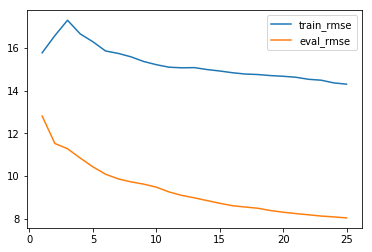

In [69]:
K = range(1, 26)
plt.plot(K, trainrmse, label = 'train_rmse')
plt.plot(K, evalrmse, label = 'eval_rmse')
plt.legend()



*Enter your observations here*

The gap between train_rmse and eval_rmse is smallest when K = 1. As the K increase, the train_rmse and eval_rmse both decrease, but the gap increase.